**Calinski-Harabasz** score a.k.a. **Variance Ratio Criterion**

https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

- A higher Calinski-Harabasz score relates to a model with better defined clusters.

- The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).




**Davies Bouldin score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score

- The minimum score is zero, with lower values indicating better clustering.

- The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.


**Silouhette score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

- The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 

- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    DBSCAN,
    KMeans
)
from sklearn.metrics import (
    davies_bouldin_score,
    calinski_harabasz_score,
    silhouette_score
)

import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
from audiovocana.dataset import get_dataset

# DEV DATASET
csv_path = '/home/utilisateur/Desktop/palomars/data/full/dataset.csv'
cache_folder = '/home/utilisateur/Desktop/palomars/cache/full_dataset'

YEAR = 17
VOCALIZATION = 1

In [58]:
dataset = get_dataset(
    csv_path=csv_path,
    cache_folder=cache_folder,
    shuffle=False,
    recompute=False
)

#dataset = dataset.filter(lambda sample: sample['vocalization'] == VOCALIZATION)
dataset = dataset.filter(lambda sample: sample['year'] == YEAR)

vocs = []
postnataldays = []
recordings = []
mothers = []
nests = []
X = []

for sample in iter(dataset):
    vocs.append(sample['vocalization'].numpy())
    postnataldays.append(sample['postnatalday'].numpy())
    recordings.append(sample['recording'].numpy())
    mothers.append(sample['mother'].numpy().decode())
    nests.append( str(sample['nest'].numpy().decode()))
    X.append(sample['mean_stft'])
    
X = np.array(X)
print(f"Features shape is (n_samples, n_features) = {X.shape}.")

Reading csv from /home/utilisateur/Desktop/palomars/data/full/dataset.csv.
Found 4217 events from 46 different experiments and 132 different recordings
Features shape is (n_samples, n_features) = (1406, 4097).


In [59]:
X = StandardScaler().fit_transform(X)

K-means

In [66]:
results = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=666).fit(X)
    labels = kmeans.labels_
    results.append({
        "n_clusters": n_clusters,
        "Calinski-Harabasz score": calinski_harabasz_score(X, labels),
        "Davies-Bouldin score": davies_bouldin_score(X, labels),
        "Silhouette Coefficient": silhouette_score(X, labels),
        "Inertia": kmeans.inertia_
    })

In [67]:
data = pd.DataFrame.from_records(results)

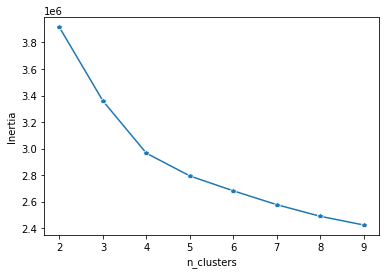

In [68]:
ax = sns.lineplot(x='n_clusters', y='Inertia', data=data, marker='p')

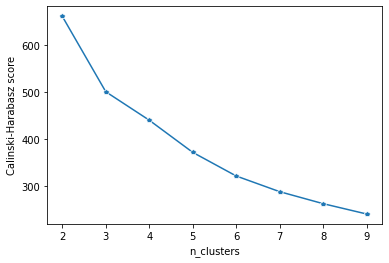

In [69]:
ax = sns.lineplot(x='n_clusters', y='Calinski-Harabasz score', data=data, marker='p')

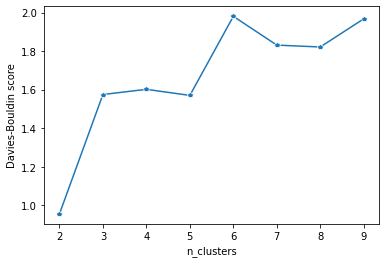

In [70]:
ax = sns.lineplot(x='n_clusters', y='Davies-Bouldin score', data=data, marker='p')

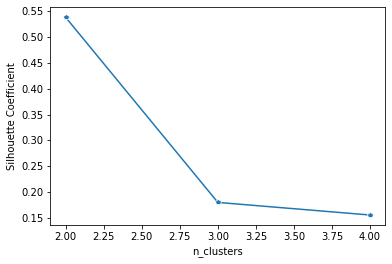

In [65]:
ax = sns.lineplot(x='n_clusters', y='Silhouette Coefficient', data=data, marker='p')